# Handling and Plotting Real Data

# 1. Structuring a dataset

### 1.1 Importing an Excel/csv File

To import a csv or an Excel file, use the ```DataFrame.read_excel()``` or ```DataFrame.read_csv()``` method, inserting the file path (relative or direct) as a string as the argument. From here we will work with datasets from a bunch of exercise activities:

In [1]:
import pandas as pd
import numpy as np

Running_df = pd.read_csv("Running.csv")
Cycling_df = pd.read_csv("Cycling.csv")
Walking_df = pd.read_csv("Walking.csv")
Weights_df = pd.read_csv("Weights.csv")

Activity_DataFrames = [Running_df, Cycling_df, Walking_df, Weights_df]

For csv files it maybe necessary to specify how the data is delimited, using the ```sep=``` argument.

In [2]:
Running_df.head()

,Activity Type,Date,Favorite,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,...,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2021-08-15 18:14:06,False,8.93,673,00:45:01,159,181,4.0,149,...,0.0,0:00,No,00:00.95,13,0.0,00:00:00,00:45:43,43,55
1,Running,2021-08-13 17:55:40,False,7.48,566,00:41:01,148,166,3.2,147,...,0.0,0:00,No,00:01.17,9,0.0,00:00:00,00:41:17,19,52
2,Running,2021-08-11 16:45:15,False,6.71,499,00:37:01,145,162,3.0,148,...,0.0,0:00,No,00:01.23,8,0.0,00:00:00,00:37:07,23,57
3,Running,2021-08-09 18:29:54,False,3.69,266,00:24:01,126,135,2.0,148,...,0.0,0:00,No,00:01.12,5,0.0,00:23:46,00:24:58,46,57
4,Running,2021-08-08 15:41:30,False,9.57,738,00:47:00,167,183,4.4,150,...,0.0,0:00,No,00:00.38,11,0.0,00:46:55,00:47:16,46,66


The ```DataFrame.head()``` method just outputs the top 5 rows of the DataFrame, which is convenient for brevity.

There are many important arguments for this methods that can help with organising data and how it is displayed:

#### 1.1.1 header =

This sets the column names to values from the rows. For example if I wanted the values of row 0 I would set header = 1 (header = 0 corresponds to the first line of the **file** - the column names.). All data before this row number is excluded, and the DataFrame can be considered to start from the line indicated by the header argument.

#### 1.1.2 index_col =

Does the same as ```header=``` but for rows instead of columns.

#### 1.1.3 names = 

This allows you to change the column names, specified as a list. If a header is already part of the data you can get rid of it, inplace of your own, by setting ```header=0``` and specifying other column names.

#### 1.1.4 usecols = 

This allows you to select a subset of columns to upload. It can be as a list or a callable function. Using a function is quicker and uses less memory. The list must be of integers (corresponding to column index) or of strings that correspond to column names. For example:

In [3]:
Running_df = pd.read_csv("Running.csv", usecols=lambda x:x in ['Date', 'Distance'])
Running_df.head()

,Date,Distance
0,2021-08-15 18:14:06,8.93
1,2021-08-13 17:55:40,7.48
2,2021-08-11 16:45:15,6.71
3,2021-08-09 18:29:54,3.69
4,2021-08-08 15:41:30,9.57


In [4]:
Running_df = pd.read_csv("Running.csv") # Reload original file.

#### 1.1.5 skiprows =

Does the same as above but for rows to skip and not columns.

#### 1.1.6 dtype =

This allows you to specify datatypes of different columns (e.g. int/int32/float) - useful so you don't have to do this after loading. This only works if the column values are of a consistent format i.e. all numbers. This works if extensive cleaing of the data is not needed. 

#### 1.1.7 nrows =

Number of rows to read, i.e. rows 0 to 10. This is useful if you don't want or need to use the whole dataset.

### 1.2 Cleaning the data

To effectively clean the data you need some sort of idea of what you want to do with it. So, let's look at Running_df again:

In [5]:
Running_df.head()

,Activity Type,Date,Favorite,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,...,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2021-08-15 18:14:06,False,8.93,673,00:45:01,159,181,4.0,149,...,0.0,0:00,No,00:00.95,13,0.0,00:00:00,00:45:43,43,55
1,Running,2021-08-13 17:55:40,False,7.48,566,00:41:01,148,166,3.2,147,...,0.0,0:00,No,00:01.17,9,0.0,00:00:00,00:41:17,19,52
2,Running,2021-08-11 16:45:15,False,6.71,499,00:37:01,145,162,3.0,148,...,0.0,0:00,No,00:01.23,8,0.0,00:00:00,00:37:07,23,57
3,Running,2021-08-09 18:29:54,False,3.69,266,00:24:01,126,135,2.0,148,...,0.0,0:00,No,00:01.12,5,0.0,00:23:46,00:24:58,46,57
4,Running,2021-08-08 15:41:30,False,9.57,738,00:47:00,167,183,4.4,150,...,0.0,0:00,No,00:00.38,11,0.0,00:46:55,00:47:16,46,66


There are loads of columns here, not all of which I want to use so I will drop some. For example, the 'Activity Type' column is redundant as I already know it's for running.

In [6]:
Running_df.columns.values

array(['Activity Type', 'Date', 'Favorite', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Elev Gain',
       'Elev Loss', 'Avg Stride Length', 'Avg Vertical Ratio',
       'Avg Vertical Oscillation', 'Training Stress Score®', 'Grit',
       'Flow', 'Dive Time', 'Min Temp', 'Surface Interval',
       'Decompression', 'Best Lap Time', 'Number of Laps', 'Max Temp',
       'Moving Time', 'Elapsed Time', 'Min Elevation', 'Max Elevation'],
      dtype=object)

In [7]:
Running_df.drop(columns=['Activity Type', 'Favorite', 'Min Temp', 'Max Temp', 'Surface Interval', 
                         'Decompression', 'Grit', 'Flow', 'Dive Time', 'Training Stress Score®',
                        'Avg Vertical Ratio', 'Avg Vertical Oscillation', 'Min Elevation', 'Max Elevation', 'Number of Laps'], 
                inplace = True)
Running_df

,Date,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time
0,2021-08-15 18:14:06,8.93,673,00:45:01,159,181,4.0,149,165,5:02,4:10,11,13,1.33,00:00.95,00:00:00,00:45:43
1,2021-08-13 17:55:40,7.48,566,00:41:01,148,166,3.2,147,156,5:29,4:44,28,30,1.24,00:01.17,00:00:00,00:41:17
2,2021-08-11 16:45:15,6.71,499,00:37:01,145,162,3.0,148,156,5:31,4:38,33,35,1.22,00:01.23,00:00:00,00:37:07
3,2021-08-09 18:29:54,3.69,266,00:24:01,126,135,2.0,148,158,6:30,5:51,10,9,1.04,00:01.12,00:23:46,00:24:58
4,2021-08-08 15:41:30,9.57,738,00:47:00,167,183,4.4,150,156,4:55,4:10,28,31,1.36,00:00.38,00:46:55,00:47:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2020-09-08 18:41:28,5.45,417,00:27:07,157,169,3.3,146,154,4:59,4:19,28,28,1.38,02:11.36,00:27:05,00:27:07
134,2020-09-07 17:50:42,5.47,424,00:27:45,158,169,3.3,145,156,5:04,4:13,28,28,1.36,02:27.53,00:27:26,00:27:49
135,2020-09-05 18:48:32,6.79,450,00:30:45,156,183,3.7,151,159,4:32,3:53,30,31,1.47,03:23.16,00:30:34,00:30:45
136,2020-09-03 08:20:17,7.01,559,00:33:46,170,183,4.1,150,159,4:49,4:01,31,30,1.38,00:01.64,00:33:33,00:33:46


This is exercise data taken over several months. Clearly, being able to plot it as a function of date or time would be useful. Therefore, we need to make sure it is in a usable format. A lot of data analysis asks questions about how things change over time. For this reason there is a dedicated python package for handling date and time data.

In [8]:
import datetime

There are 4 core objects that more or less encapture the use of datetime. They can be considered objects which correspond to our concepts of dates - ```datetime.date```, times - ```datetime.time```, both - ```datetime.datetime```, and time periods - ```datetime.timedelta```. The data above is split between datetime objects and time objects. The methods we will use here for each object are the same for each object.

In [9]:
from datetime import datetime as dt

I will take the first value from the 'Date' column as an example.

In [10]:
Example_Date = Running_df['Date'][0]
Example_Date

'2021-08-15 18:14:06'

Currently the 'Date' column's dtype is:

In [11]:
Running_df.dtypes['Date']

dtype('O')

Which stands for 'object', that object being a string. I want to turn this string into a datetime object. To do this I use the ```dt.strptime()``` method:

In [12]:
dt.strptime(Example_Date, "%Y-%m-%d %H:%M:%S")

datetime.datetime(2021, 8, 15, 18, 14, 6)

As arguments, I have specifed the object I want to transform into a datetime object and I have entered a string which represents how the date and time are structured. This tells the method how your date and time is structured so it knows what to do with it. The letters after the "%"s in the string represent different displays of dates or times. For example, %Y corresponds to the four-digit year, i.e. 2021 not '21. A full list of the different formats can be found [here](https://www.w3schools.com/python/python_datetime.asp).

Now I can apply this to each date in Running_df:

In [13]:
Running_df['Date']=Running_df['Date'].apply(dt.strptime, args=("%Y-%m-%d %H:%M:%S",))

To check that this has done what I wanted, I can see what the 'Date' column's dtype is now:

In [14]:
Running_df.dtypes['Date']

dtype('<M8[ns]')

Aside: ```DataFrame.copy()```. When doing any operation on a DataFrame, returns a **copy** of the DataFrame, which can then be stored in a new variable. It does not effect the original DataFrame. However if you just assign a new name to the DataFrame such as ```New_df = Old_df```, ```New_df``` is **not** a copy. This means that changes you make to ```New_df``` change ```Old_df``` too. To avoid this you need to use ```New_df = Old_df.copy()```. Not doing this you can forget that new variable assigment does not create a copy of the DataFrame and you can end up editing your original DataFrame without knowing.

As a first analysis, I can see how average heart rate for similar paces has varied over time. First I need the average heart rate column to be a number type, so that it is plottable.

In [15]:
Running_df.dtypes['Avg HR']

dtype('O')

This isn't what I want so i'll change it to integer type, using the ```DataFrame.astype``` method.

In [16]:
Running_df.astype({'Avg HR':'int'})

ValueError: invalid literal for int() with base 10: '--'

This hasn't worked as not every item in the column has the form of a base 10 number, there is a string value of '--'. I need to remove these for it to work. This is the issue that was mentioned in 1.1.6. I can change this using a mask.

In [17]:
Running_df = Running_df[Running_df['Avg HR']!='--']

This should work if that was the only type of value not in the format of a number:

In [18]:
Running_df = Running_df.astype({'Avg HR':'int'})

No error, good.

I know I want to filter the runs that are of a similar pace, let's say at around 5:30/km and from the last few months.

In [19]:
Running_df['Avg Pace'] = Running_df['Avg Pace'].apply(dt.strptime, args=("%M:%S",))

Temp_df = Running_df[Running_df['Avg Pace'] < dt.strptime('5:35', '%M:%S')]
Temp_df = Temp_df[Temp_df['Avg Pace'] > dt.strptime('5:25', '%M:%S')]
Temp_df = Temp_df[Temp_df['Date'] > dt.strptime('2021-06', '%Y-%m')]
Temp_df

,Date,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Moving Time,Elapsed Time
1,2021-08-13 17:55:40,7.48,566,00:41:01,148,166,3.2,147,156,1900-01-01 00:05:29,4:44,28,30,1.24,00:01.17,00:00:00,00:41:17
2,2021-08-11 16:45:15,6.71,499,00:37:01,145,162,3.0,148,156,1900-01-01 00:05:31,4:38,33,35,1.22,00:01.23,00:00:00,00:37:07
5,2021-08-07 15:12:24,7.26,539,00:40:01,145,163,3.2,148,155,1900-01-01 00:05:31,4:43,32,35,1.23,00:00.51,00:40:00,00:40:08
7,2021-07-29 18:52:50,6.82,523,00:37:01,152,168,3.3,147,153,1900-01-01 00:05:26,4:50,29,30,1.26,00:01.25,00:36:59,00:37:23
8,2021-07-26 17:02:04,6.74,520,00:37:02,150,165,3.3,146,153,1900-01-01 00:05:30,4:47,30,35,1.25,00:01.65,00:36:44,00:37:20
9,2021-07-24 11:40:53,6.93,513,00:38:01,147,164,3.3,147,161,1900-01-01 00:05:29,4:47,36,35,1.24,00:01.15,00:38:00,00:38:01
10,2021-07-22 17:46:08,6.92,529,00:38:01,151,166,3.3,147,155,1900-01-01 00:05:30,4:51,32,36,1.23,00:01.29,00:37:50,00:38:22
11,2021-07-20 17:15:05,6.54,492,00:35:46,147,165,3.3,147,156,1900-01-01 00:05:28,4:32,29,33,1.24,01:09.22,00:35:24,00:36:08
13,2021-07-17 14:29:39,6.80,527,00:37:27,154,167,3.4,147,151,1900-01-01 00:05:31,4:40,33,35,1.24,01:05.65,00:37:21,00:37:33
14,2021-07-15 18:01:25,6.12,462,00:34:02,148,164,3.2,145,152,1900-01-01 00:05:34,4:37,31,33,1.24,00:02.47,00:33:58,00:34:20


To reset the index, I can use the ```reset_index``` method. Note this shifts the current index into a column. I can choose to remove that, or you can keep it if you want to know which indices the rows from this DataFrame correspond to the original. I will remove it.

In [20]:
Temp_df = Temp_df.reset_index().drop(columns='index')

### 1.3 Plotting the Data

The data should now be ready to plot and analysis. To do this I will use the package ```matplotlib```. This is a mathematical plotting package that is much more sophisticated that just the ```DataFrame.plot```. Although ```DataFrame.plot``` uses matplotlib to plot, it's more versitle to use the package itself.

In [21]:
import matplotlib.pyplot as plt

In general, you plot using plt with the command ```plt.plot```, where ```.plot``` can be replaced with different kinds of plots, such as scatter, which I will use here.

(array([18793., 18809., 18823., 18840., 18854.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

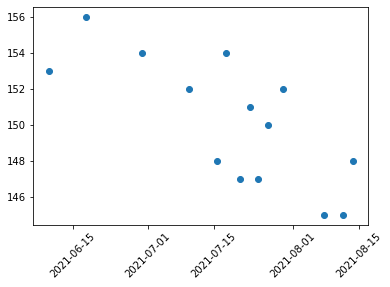

In [22]:
plt.scatter(x=Temp_df['Date'], y=Temp_df['Avg HR'])
plt.xticks(rotation=45)

I can conclude that the average heart rate on similar effort runs has decreased over the past few months. 

#### 1.3.1 Groupby and strftime methods

What about the average heart rate over the past year, regardless of pace? I could plot all the data but it might be more insightful to measure the average per month. This can be done by using the ```DataFrame.groupby()``` method.

First I need to change the date's format so that those that fall in the same month have a common value. I can reorganise a datetime object into a string of specific format using the method ```datetime.strftime()```:

In [23]:
Running_df['Date'] = Running_df['Date'].apply(dt.strftime, args=('%b-%y',))

Here, the argument passed is the format you wish the date and time to be displayed. I have chosen just the year and month all exercise within a month has the same date.

I can now use the ```.groupby``` method to group all rows based on a common value in another column, namely the 'Date' column. I therefore group all runs together that occured in the same month. From there I can apply the ```.mean``` method to average the values for 'Avg HR':

<AxesSubplot:xlabel='Date'>

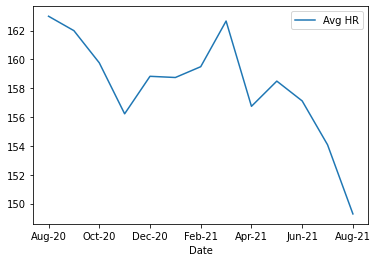

In [24]:
Running_df[['Date', 'Avg HR']].groupby(by=['Date'], sort=False).mean()[::-1].plot()

Plotting reveals that during the summer months average heart rate during runs tends to decrease, while during winter months it tends to increase.

I could try and explain this by seeing if there were fewer runs during the winter months and more during summer months.

In [25]:
Total_Dist_df = Running_df[['Date', 'Distance']].groupby(by='Date', sort=False, as_index=False).sum()[::-1]

There are two important key words I have used here. The ```sort=``` keyword sorts the rows by index value, for example in alphabetical (for words) or ascending (for numbers) order. The ```as_index=``` keyword allows you to choose to leave the group keys as an index - here being 'Date'. I do not want this as it's easier to plot leaving it as a column rather than an index.

#### 1.3.2 Brief view of matplotlib

I want to plot the distance data as a scatter graph, over the line graph of average heart rate. This requires the use of matplotlib. First I use the ```plt.subplots()``` function to produce an instance figure and axes objects.

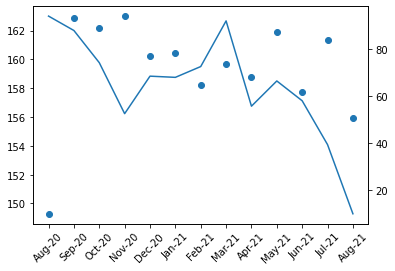

In [26]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(Running_df[['Date', 'Avg HR']].groupby(by=['Date'], sort=False).mean()[::-1])
ax2.scatter(x=Total_Dist_df['Date'], y=Total_Dist_df['Distance'])

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45); # A ';' suppresses the output

Since my graphs will not be on the same scale I want two different y axes, but a common x axis. I can use the method ```.twinx()``` to do so. I now have two axes objects on the same figure which I can use to plot.

Although this plot is useful in its current form, it's not the most attractive nor is it the most clear. This is how matplotlib can be used to improve and manipulate the plots.